# Исследование рынка компьютерных игр


**Заказчик:** Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. 

**Цель:** Выявить определяющие успешность игры закономерности, которые позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Предпосылки:** 
Сейчас декабрь 2016 года. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 
Путь к файлу с данными: /datasets/games.csv.

**Описание данных:**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

**План работы**

1. Обзор данных 


2. Предобработка данных
- заменить названия столбцов (привести к нижнему регистру);
- преобразовать данные в нужные типы;
- обработать пропуски при необходимости;
- аббревиатуру 'tbd' - значение и обработка;
- посчитать суммарные продажи во всех регионах и записать их в отдельный столбец
3. Исследовательский анализ данных
- посмотреть сколько игр выпускалось в разные годы, определить важны ли данные за все периоды;
- посмотрите как менялись продажи по платформам, выбрать платформы с наибольшими суммарными продажами и построить распределение по годам, выявить за какой характерный срок появляются новые и исчезают старые платформы;
- определить актуальный период с которым стоит работать и который поможет построить прогноз на 2017 год;
- определить какие платформы лидируют по продажам, растут или падают; 
- выберать несколько потенциально прибыльных платформ;
- построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам;
- посмотреть как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков, построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами;
- посмотрите на общее распределение игр по жанрам, понять, что можно сказать о самых прибыльных жанрах, определить выделяются ли жанры с высокими и низкими продажами;
4. Портрет пользователя каждого региона
- определить для пользователя каждого региона (NA, EU, JP):
    - самые популярные платформы (топ-5), описать различия в долях продаж,
    - самые популярные жанры (топ-5), пояснить разницу,
    - влияет ли рейтинг ESRB на продажи в отдельном регионе
5. Проверка гипотез
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные
6. Общий вывод

### Обзор данных

Импортируем Пандас и необходимые для работы библиотеки:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats as st

pd.set_option('display.max_columns', None)

Откроем файл /datasets/games.csv, сохраним датафрейм в переменную df.

In [2]:
df = pd.read_csv('/datasets/games.csv')

Посмотрим на содердающуюся в датафрейме информацию

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.tail(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [5]:
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
15196,Big Idea's VeggieTales: LarryBoy and the Bad A...,PS2,2006.0,Action,0.01,0.01,0.00,0.00,NaN,NaN,NaN
1756,Sniper: Ghost Warrior,X360,2010.0,Shooter,0.54,0.50,0.00,0.12,45.0,5.8,M
4645,Blazing Angels: Squadrons of WWII,X360,2006.0,Simulation,0.36,0.02,0.00,0.03,66.0,7.9,T
14499,Sunny Garcia Surfing,PS2,2001.0,Sports,0.02,0.01,0.00,0.00,61.0,7.9,E
4543,SEGA Classics Collection,PS2,2005.0,Misc,0.21,0.16,0.00,0.05,46.0,6.7,T
4885,Fire Emblem: Fuuin no Tsurugi,GBA,2002.0,Role-Playing,0.00,0.00,0.39,0.00,NaN,NaN,NaN
1046,Kanshuu Nippon Joushikiryoku Kentei Kyoukai: I...,DS,2006.0,Misc,0.00,0.00,1.71,0.00,NaN,NaN,NaN
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.00,0.19,75.0,7.7,E10+
1611,[Prototype],PS3,2009.0,Action,0.65,0.40,0.00,0.19,79.0,7.7,M
2248,South Park: The Stick of Truth,PS3,2014.0,Role-Playing,0.43,0.34,0.00,0.16,85.0,8.5,M


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В датафрейме 16714 строк с данными и 11 столбцов. 

В некоторых ячейках отсутствует информация - пропущены два значения с названиями игр и жанром, чуть больше - значений с годом релиза и достаточно много пропусков в столбцах с оценкой критиков, оценкой пользователей и рейтингом ESRB.

Тип данных в столбце с годом релиза должен быть целочисленным, но там float64, это связано с пропусками, также подозрительно выглядит тип object в столбце с пользовательской оценкой - видимо в данных не только числа, отображение последних и случайных строк показало наличие некоего значения tbd, c которым предстоит разобраться позже. 

In [7]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


В данном случае описание, к сожалению, дает нам мало информации (возможно пока).

Проверим количество строк-дубликатов:

In [8]:
df.duplicated().sum()

0

Полностью идентичных строк нет, но повторы возможны, если данные хотя бы одного из столбцов измнены (например, у игры укзазан другой рейтинг, год релиза, платформа, продажи и проч.).

**Вывод**

Файл прочитан. В датафрейме 16714 строк с данными и 11 столбцов. 

В некоторых ячейках отсутствует информация - пропущены два значения с названиями игр и жанром, чуть больше - значений с годом релиза и достаточно много пропусков в столбцах с оценкой критиков, оценкой пользователей и рейтингом ESRB.

Возможно, это связано с тем, что система оценки еще не существовала в годы, когда выходили некоторые из игр. Необходимо это проверить и подумать что можно сделать с пропусками в столбцах с оценками (их количество критичное).

Тип данных в столбце с годом релиза должен быть целочисленным, но там float64, это связано с пропусками, также подозрительно выглядит тип object в столбце с пользовательской оценкой - видимо в данных не только числа, отображение последних и случайных строк показало наличие некоего значения tbd, c которым также необходимо разобраться.  

В названиях столбцов не соблюден "змеиный" регистра, необходимо попраивть названия столбцов.

### Предобработка данных

Приведем названия столбцов к "змеиному" регистру: 

In [9]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Чтобы привести стобец с годом релиза в целочисленный, необходимо предварительно удлаить из него пропуски. 
Посмотрим сколько в нем пропусков:

In [10]:
print(df['year_of_release'].isna().sum())
print((df['year_of_release'].isna().sum())/len(df['year_of_release'])*100)

269
1.609332934489979


Пропусков всего 269, что составляет 1.61% от общего числа, это не критично, поэтому удалим строки с пропусками и приведем столбец к формату int. 

In [11]:
df = df.dropna(subset=['year_of_release'])
df['year_of_release'] = df['year_of_release'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Остается 2 строки без названия, также удалим их: 

In [12]:
df = df.dropna(subset=['name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Теперь остались пропуски в строках с рейтингами, будем разбираться с ними.

In [13]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [14]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [15]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В википедии [указано](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board), что в рейтинге ESRP шкала оценок следюущая:
- «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов;
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет;
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет;
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»;
- "K-A" ("Kids to Adults") - так первоначально обозначался рейтинг "Е";
- «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет;
- «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими;
- «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.

Заменим. "К-А" на "Е".

In [16]:
df.loc[df['rating'] == 'K-A', 'rating'] = 'E'
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

Отсутсвие оценок возможно связано с тем, что организация ESRB была основна в 1994 году, поэтому игры, вышедшие ранее, не имеют оценок от нее. 

In [17]:
df.groupby('year_of_release')['rating'].count()

year_of_release
1980       0
1981       0
1982       0
1983       0
1984       0
1985       1
1986       0
1987       0
1988       1
1989       0
1990       0
1991       0
1992       2
1993       0
1994       1
1995       0
1996       7
1997      19
1998      32
1999      42
2000     148
2001     339
2002     655
2003     613
2004     598
2005     706
2006     678
2007     821
2008     981
2009    1011
2010     799
2011     703
2012     355
2013     316
2014     345
2015     315
2016     280
Name: rating, dtype: int64

Видим, что до 1997 года какие-то единицы игр имеют рейтинг. 

Подставим в столбец rating вместо пропусков значение "no_rating".

In [18]:
df['rating'] = df['rating'].fillna('no_rating')
df['rating'].unique()

array(['E', 'no_rating', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

Посмотрим как обстоят дела с оценками критиков и пользователей в срезе по годам:

In [19]:
display(df.groupby('year_of_release')['critic_score'].count())
display(df.groupby('year_of_release')['user_score'].count())

year_of_release
1980      0
1981      0
1982      0
1983      0
1984      0
1985      1
1986      0
1987      0
1988      1
1989      0
1990      0
1991      0
1992      1
1993      0
1994      1
1995      0
1996      8
1997     17
1998     28
1999     39
2000    143
2001    326
2002    627
2003    585
2004    561
2005    655
2006    620
2007    692
2008    715
2009    651
2010    500
2011    500
2012    321
2013    273
2014    261
2015    225
2016    232
Name: critic_score, dtype: int64

year_of_release
1980       0
1981       0
1982       0
1983       0
1984       0
1985       1
1986       0
1987       0
1988       1
1989       0
1990       0
1991       0
1992       1
1993       0
1994       1
1995       0
1996       8
1997      19
1998      31
1999      39
2000     150
2001     339
2002     656
2003     611
2004     596
2005     704
2006     676
2007     821
2008     987
2009    1019
2010     798
2011     718
2012     363
2013     319
2014     350
2015     335
2016     296
Name: user_score, dtype: int64

In [20]:
display(df.query('year_of_release < 1996'))
print('Всего пропусков в столбце с оценками критиков:', df['critic_score'].isna().sum())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,no_rating
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,no_rating
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,NaN,NaN,no_rating
21,Super Mario Land,GB,1989,Platform,10.83,2.71,4.18,0.42,NaN,NaN,no_rating
...,...,...,...,...,...,...,...,...,...,...,...
15692,Empire Deluxe,PC,1992,Strategy,0.02,0.00,0.00,0.00,NaN,NaN,no_rating
15788,World Class Rugby 2: Kokunai Gekitou Hen '93,SNES,1994,Sports,0.00,0.00,0.02,0.00,NaN,NaN,no_rating
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,NaN,NaN,no_rating
16207,Rock N' Roll Racing,SNES,1993,Racing,0.00,0.00,0.01,0.00,NaN,NaN,no_rating


Всего пропусков в столбце с оценками критиков: 8461


Практически идентично до 1996 года игры не оценивались ни критиками, ни пользователями. Однако, до 1996 года по данным в нашем датафрейме вышло чуть больше 705 игр, это лишь 8% от всех пропусков.

Что касается аббревиатуры "tbd", то удалось выяснить, что это расшифровывается как "to be determined" - "уточняется",  и платформы с отзывами могут ее использовать для элементов, которые не имеют по крайне мере 4 отзывов. Соответственно, предлагаю tbd заменить на NaN.

In [21]:
df.user_score.replace('tbd', np.nan, inplace=True)
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Заменим тип данных столбца:

In [22]:
df['user_score'] = df['user_score'].astype('float')

Не будем в стобцах user_score и critic_score менять отствующие значения на "no_rating", чтобы оставить их в числовом формате. При этом что-то подставить и заполнить пропуски не представляется возможным. Удалить строки также нельзя в силу того, что их большое количество.  

Теперь посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец:

In [23]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [24]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


**Вывод**

Мы осуществили предобработку данных:
- удалили пропуски там, где это было возможно (значения без года выпуска и названия игры);
- определили возможные оценки от ESRB, привели их к современному виду, пропуски в столбце заполнили значением "no_rating";
- выяснили, что tbd ставят в случаях, когда у игры менее 4 оценок и поэтому заменили эти значения на nan;
- определили, что до 1996 года игры практически не оценивались, однако лишь небольшая часть пропусков в рейтингах связана с этим (около 8%);
- изменили тип данных в столбцах year_of_release и user_score на int64 и float64 соответственно;
- посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.

### Исследовательский анализ данных

После предобработки можно перейти к исследованию данных. 

Посморим как игры выпускалсь в разные годы, изучим изменение продаж по платформам, определим какой период можно считать актуальным для прогноза на 2017 год, узнаем какие жанры игр являются самыми прибыльными.

#### Выпуск игр в разные годы

Еще на этапе предобработки данных стало заметно, что до 1996 года игр выпускалось не так много. Посмотрим сколько игр выпускалось в каждый год, который есть в нашем датафрейме.

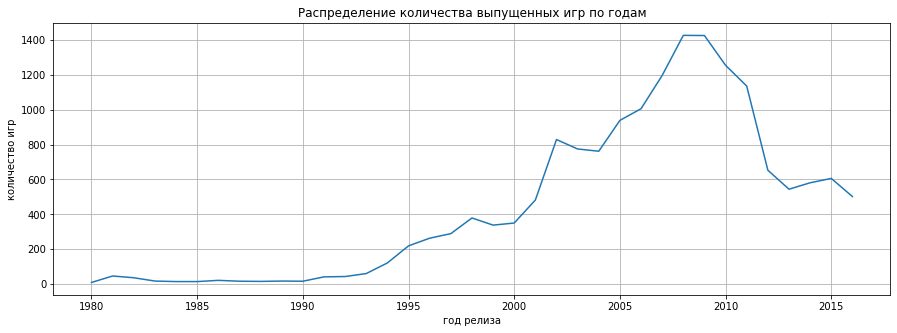

In [27]:
(df.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
.plot(grid=True, figsize = (15,5),
xlabel='год релиза', 
ylabel='количество игр', 
title='Распределение количества выпущенных игр по годам'))
plt.legend().remove()

In [28]:
display(df.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count'))

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


**Вывод**

Пик выпуска игр пришелся с 2002 по 2011 годы, с 2012 наблюдается снижение, до 1994 выпускалось мало игр. То есть наиболее актуальный период начинается с 1994 года.
Это связано с развитием компьютерной техники и компьютеризации общества, максимальные значения видим в 2008-2009 годах, последующий спад, скорее всего, связан с развитием смартфонов и переходом игр в другой формат.  

#### Платформы для игр

Посмотрим какое количество игр на той или иной платформе в сумме было продано.

In [29]:
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
display(platform_sales)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Выделяется топ-6 платформ с наибольшими продажами: PS, DS, Wii, PS3, X360, PS2.
Сформируем сводную таблицу с разрезом продаж на этих платформах по годам. И для наглядности построим график.

In [30]:
top_platforms = (df.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
                 .fillna(0))
top_platforms = top_platforms[['PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2']]  
display(top_platforms)

platform,PS,DS,Wii,PS3,X360,PS2
year_of_release,,,,,,
1980,0.00,0.00,0.00,0.00,0.00,0.00
1981,0.00,0.00,0.00,0.00,0.00,0.00
1982,0.00,0.00,0.00,0.00,0.00,0.00
1983,0.00,0.00,0.00,0.00,0.00,0.00
1984,0.00,0.00,0.00,0.00,0.00,0.00
1985,0.00,0.02,0.00,0.00,0.00,0.00
1986,0.00,0.00,0.00,0.00,0.00,0.00
1987,0.00,0.00,0.00,0.00,0.00,0.00
1988,0.00,0.00,0.00,0.00,0.00,0.00


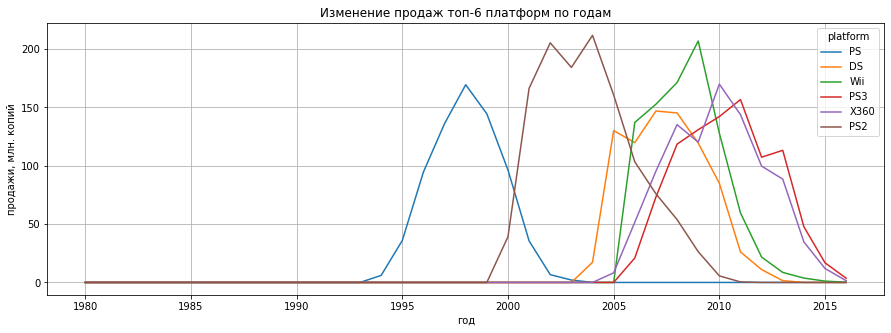

In [31]:
top_platforms.plot(grid=True, figsize = (15,5),
xlabel='год',
ylabel='продажи, млн. копий',
title='Изменение продаж топ-6 платформ по годам');

Из графиков видно, что новые платформы появляются и исчезают. Жизненный цикл платформы - 10-12 лет. Пик приходится на 3-5 годы. Соответственно для прогноза на 2017 год актуальной является информация за последние 5 лет. 

Посмотрим, какие платформы лидируют по продажам, растут или падают. Попробуем выбрать несколько потенциально прибыльных платформ. 

In [32]:
df.query('year_of_release >= 2012').pivot_table(index = 'year_of_release', columns = 'platform', 
values = 'total_sales', aggfunc = 'sum').fillna(0)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,0.00,7.69,16.19,21.71,17.56,99.74,0.00
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


Ситуация выглядит довольно грустно: не видно ни одной платформы, по которой наблюдался бы рост в последние 2-3 года. Все они идут на спад или уже мертвы. 

Лидируют по продажам на 2016 год PS4 - 69.25 млн.копий, XOne - 26.15 и 3DS - 15.14

Они же, скорее всего, в 2017 году еще принесут прибыль: 3DS - три года подряд наблюдается снижение продаж, PS4 и XOne - упали продажи только в 2016 году.

Посмотрим глобальные продажи игр в разбивке по платформам за актуальный период 2012-2016 гг.

In [33]:
actual_period = df.query('year_of_release >= 2012')
actual_period.sort_values(by='total_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no_rating,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_rating,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90


Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.


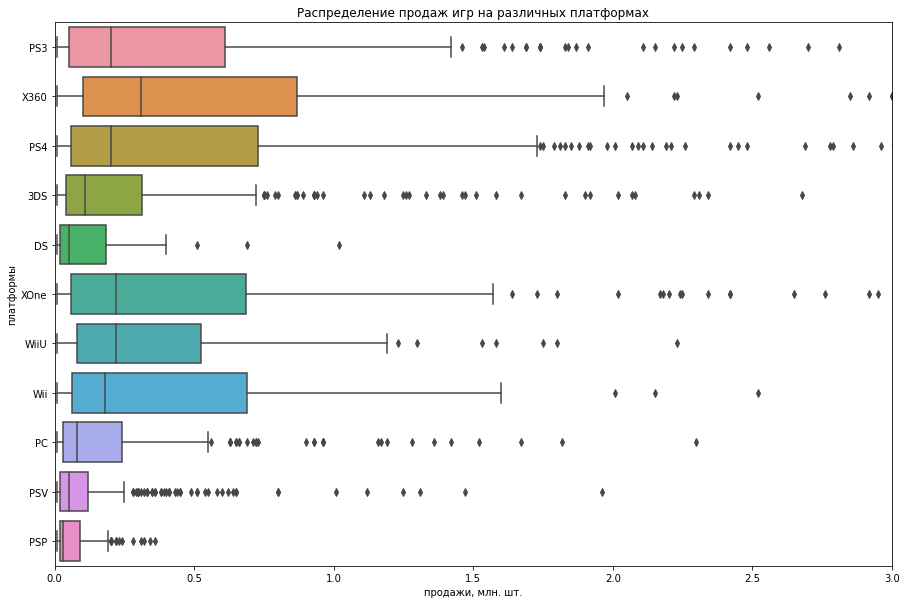

In [34]:
plt.figure(figsize=(15,10))

ax = sns.boxplot(y='platform', x='total_sales', data=actual_period)
ax.set_xlim(0, 3)
ax.set_title('Распределение продаж игр на различных платформах')
ax.set_ylabel('платформы')
ax.set_xlabel('продажи, млн. шт.');

Медианные значения продаж на всех платформах сдвинуты влево, это говорит о том, что на всех этих платформах выходит достаточно много игр с небольшими продажами. 

Наибольший разброс значений у X360 и PS4.

Посмотрим на графики в большем масштабе.

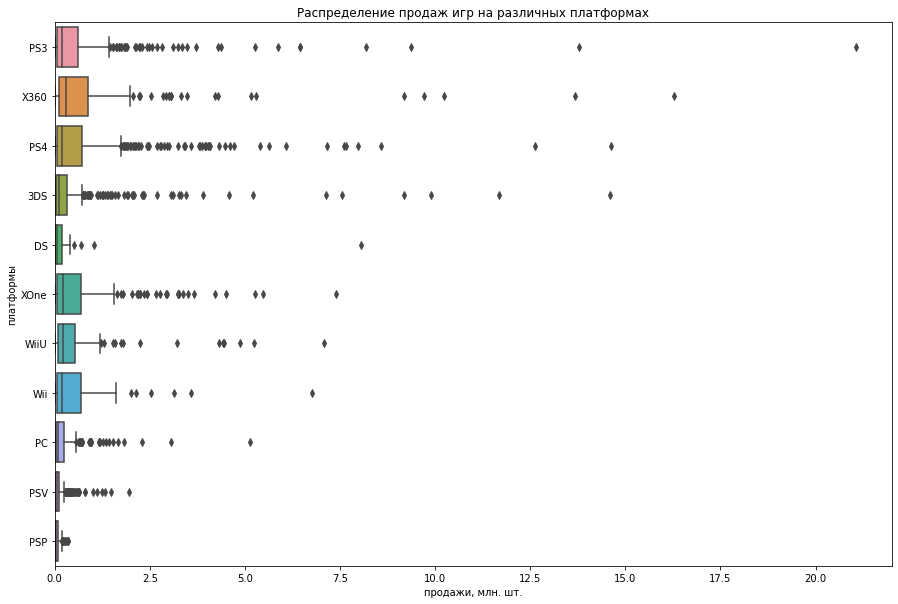

In [35]:
plt.figure(figsize=(15,10))

ax = sns.boxplot(y='platform', x='total_sales', data=actual_period)
ax.set_xlim(0, 22)
ax.set_title('Распределение продаж игр на различных платформах')
ax.set_ylabel('платформы')
ax.set_xlabel('продажи, млн. шт.');

Если смотреть в большем масштабе, то у каждой платформы есть одна игра, которая находится далеко за пределеами "усов" - это самые популярные игры (например, "Grand Theft Auto V" на PS3 и  X360, "Call of Duty: Black Ops 3" на PS4 и Pokemon X/Pokemon Y на 3DS с продажам 21.05 и 16.27, 14.63 и 14.60 млн. копий соответственно). 

Также здесь видно, что выбросов у WiiU и DS меньше, чем у остальных платформ, то есть на них меньше популярных игр, и больше игр объем продаж которых лежит рядом с медианным значением. 

**Вывод**

Жизненный цикл платформы - 10-12 лет. Пик приходится на 3-5 годы. Соответственно для прогноза на 2017 год актуальной является информация за последние 5 лет. 


При анализе продаж в 2012-2016 гг. не видно ни одной платформы, по которой наблюдался бы рост в последние 2-3 года. Все они идут на спад или уже мертвы.
Лидируют по продажам на 2016 год PS4 - 69.25 млн.копий, XOne - 26.15 и 3DS - 15.14

Медианные значения продаж на всех платформах сдвинуты влево, это говорит о том, что на всех этих платформах выходит достаточно много игр с небольшими продажами. 

Наибольший разброс значений у X360 и PS4.
Мы построили графики "ящик с усами", чтобы посмореть распределние продаж по платформам. У каждой платформы есть одна игра, которая находится далеко за пределеами "усов" - это самые популярные игры (например, "Grand Theft Auto V" на PS3 и  X360, "Call of Duty: Black Ops 3" на PS4 и Pokemon X/Pokemon Y на 3DS с продажам 21.05 и 16.27, 14.63 и 14.60 млн. копий соответственно).

Среди платформ выделяется WiiU и DS: выбросов у WiiU и DS меньше, чем у остальных платформ, то есть на них меньше популярных игр, и больше игр объем продаж которых лежит рядом с медианным значением. 


#### Влияение отзывов на объем продаж

Посмотрим, как влияют на продажи внутри платформы отзывы пользователей и критиков:

In [36]:
actual_period.groupby('platform')[['user_score', 'critic_score']].agg('mean')

,user_score,critic_score
platform,,
3DS,7.033333,69.817308
DS,7.000000,80.000000
PC,6.428641,75.838384
PS3,6.532862,71.565421
PS4,6.748249,72.091270
PSP,5.950000,74.000000
PSV,7.410000,71.327103
Wii,6.082353,76.200000
WiiU,6.904000,70.733333


Не самые высокие оценки. 

Теперь посчитаем окрреляцию между отзывами и продажами, а также построим диаграмму рассеяния для самой популярной и перспективной платформы - PS4.

In [37]:
ps4 = actual_period.query('platform == "PS4"')
display(ps4)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rating,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,no_rating,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


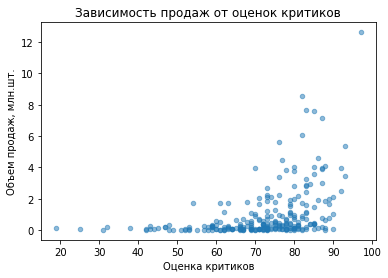

In [38]:
ps4.plot(kind = 'scatter', y = 'total_sales', x = 'critic_score', alpha = 0.5)
plt.title('Зависимость продаж от оценок критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Объем продаж, млн.шт.')
plt.show()

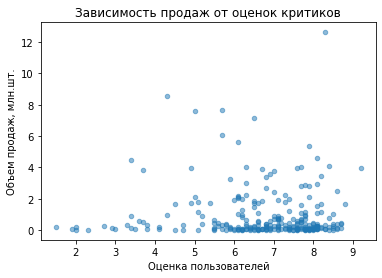

In [39]:
ps4.plot(kind = 'scatter', y = 'total_sales', x = 'user_score', alpha = 0.5)
plt.title('Зависимость продаж от оценок критиков')
plt.xlabel('Оценка пользователей')
plt.ylabel('Объем продаж, млн.шт.')
plt.show()

Кажется, объем продаж больше зависит от оценки критиков, но все равно сильной зависимости не наблюдается.
Посчитаем коэффициенты корреляции.

In [40]:
correlation = ps4[['total_sales','user_score','critic_score']].corr()
display(correlation)

,total_sales,user_score,critic_score
total_sales,1.000000,-0.031957,0.406568
user_score,-0.031957,1.000000,0.557654
critic_score,0.406568,0.557654,1.000000


Коэффициенты корреляции показывают, что взаимосвзяь между оценками и объемом продаж на платформе PS4 слабая.
Возможно популярность той или иной игры связана больше с рекламой и пиаром, а не оценками. В этой связи люди стараются купить игру как можно быстрее, сразу после выхода, а затем уже оценивают ее.

Посмотрим на корреляцию на других платформах.
Для того, чтобы сделать вывод, возьмем еще 6 платформ. Пусть это будут 3DS, PC, PS3, PSV, XOne, WiiU - платформы, которые входили в топ-6 по глобальным продажам в 2016 году.
Сначала посмотрим как объем продаж зависит от оценок критиков.

Корреляция объема продаж и оценок критиков по платформам 3DS, PC, PS3, PSV, XOne, WiiU (сверху-вниз):


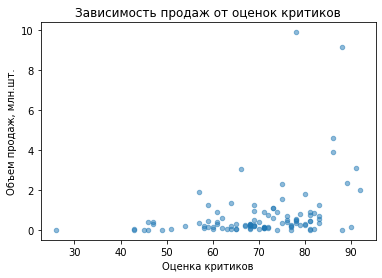

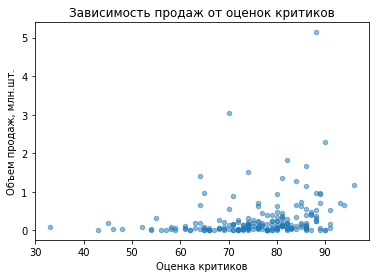

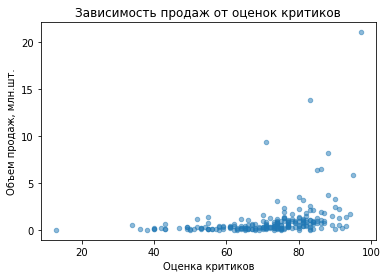

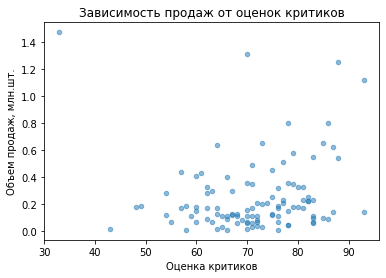

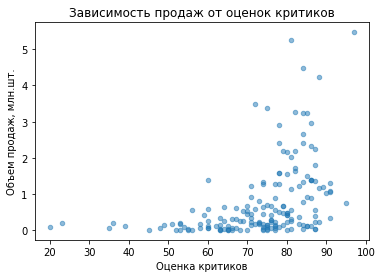

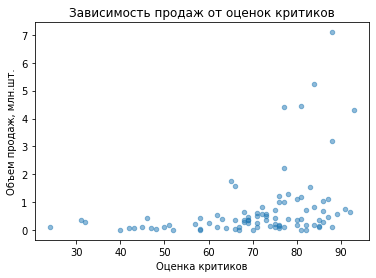

In [41]:
platform_list = ['3DS', 'PC', 'PS3', 'PSV', 'XOne', 'WiiU']
print('Корреляция объема продаж и оценок критиков по платформам 3DS, PC, PS3, PSV, XOne, WiiU (сверху-вниз):')
for i in platform_list:
    (actual_period.query('platform==@i')
    .plot(kind = 'scatter', y = 'total_sales', x = 'critic_score', alpha = 0.5,
    title='Зависимость продаж от оценок критиков',
    xlabel='Оценка критиков',
    ylabel='Объем продаж, млн.шт.'))

In [42]:
print('Корреляция объема продаж и оценок критиков по платформам 3DS, PC, PS3, PSV, XOne, WiiU (сверху-вниз):')
for i in platform_list:
    print(actual_period.query('platform==@i')['critic_score'].corr(actual_period['total_sales']))

Корреляция объема продаж и оценок критиков по платформам 3DS, PC, PS3, PSV, XOne, WiiU (сверху-вниз):
0.3208028695360785
0.23724324311567915
0.3314972592629587
0.0944878992931617
0.4169983280084017
0.34837976012017485


Корреляция объема продаж и оценок пользователей по платформам 3DS, PC, PS3, PSV, XOne, WiiU (сверху-вниз):


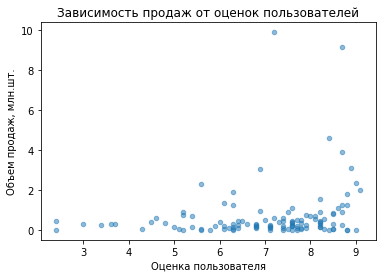

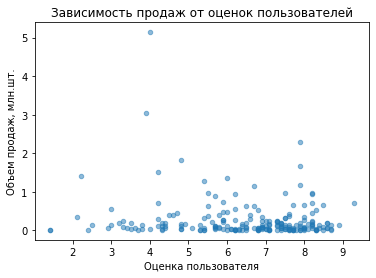

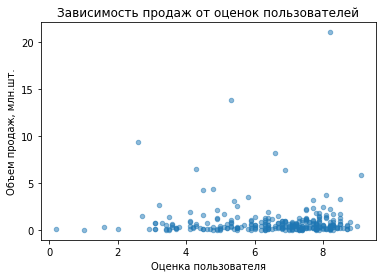

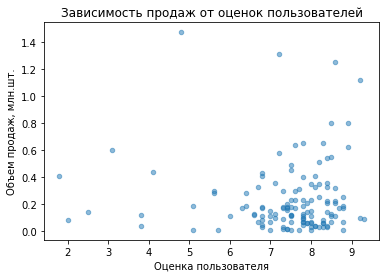

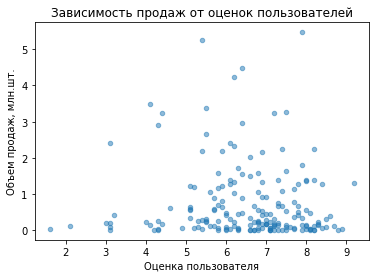

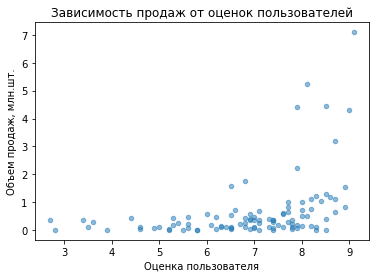

In [43]:
print('Корреляция объема продаж и оценок пользователей по платформам 3DS, PC, PS3, PSV, XOne, WiiU (сверху-вниз):')
for i in platform_list:
    (actual_period.query('platform==@i')
    .plot(kind = 'scatter', y = 'total_sales', x = 'user_score', alpha = 0.5,
    title='Зависимость продаж от оценок пользователей',
    xlabel='Оценка пользователя',
    ylabel='Объем продаж, млн.шт.'))

In [44]:
print('Корреляция объема продаж и оценок пользователей по платформам 3DS, PC, PS3, PSV, XOne, WiiU (сверху-вниз):')
for i in platform_list:
    print(actual_period.query('platform==@i')['user_score'].corr(actual_period['total_sales']))

Корреляция объема продаж и оценок пользователей по платформам 3DS, PC, PS3, PSV, XOne, WiiU (сверху-вниз):
0.19758263411038599
-0.12186747630735577
-0.005143522887113828
-0.004339437514314869
-0.06892505328279414
0.4002190202148617


**Вывод**

Расммотрели влияение оценок пользователей и критиков на объем продаж игр на платформе PS4. Коэффициент корреляции объема продаж с оценкой критиков составил 0.4, а с оценками пользователей -0.03. Это показывает, что взаимосвзяь между оценками и объемом продаж на платформе PS4 слабая. Но при этом оценки критиков на объем продаж влияют больше. 

Рассмотрели ситуацию еще на 6 платформах. И по 5 из 6 рассмотренных платформ ситуация аналогична с PS4 - зависимость между оценками и объемом продаж слабая, при этом оценки критиков влияют на продажу чуть больше, чем оценки пользователей.

Но есть и интересные особенности: на платформе PSV корреляция с оценками критиков всего 0.09, что значиельно ниже показателей остальных платформ, корреляция с оценками пользователей вообще 0. То есть можно сделать вывод, что на объем продаж игр на платформе оценки пользвателй и критиков никак не влияют.

Также есть интересная особенность на платформе WiiU - там корреляция оценок пользователй и оценок критиков с обемом продаж примерно одинакова (даже у оценок критиков чуть ниже), в целом, зависимость есть, но все равно слабая.

Возможно популярность той или иной игры связана больше с рекламой и пиаром, а не оценками. В этой связи люди стараются купить игру как можно быстрее, сразу после выхода, а затем уже оценивают ее.

#### Жанры

Теперь посмотрим на рапределение игр по жанрам.

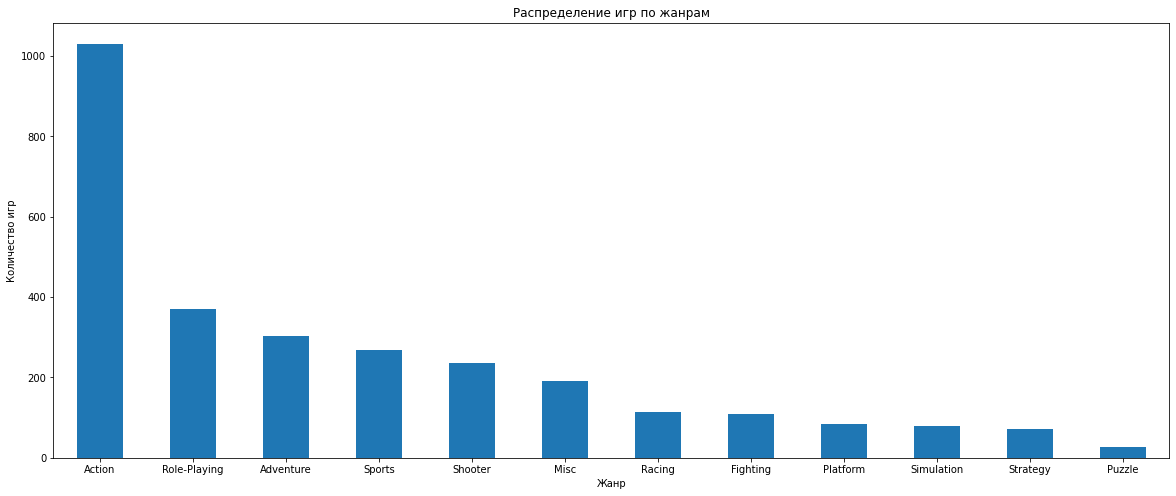

In [46]:
(actual_period.groupby('genre').agg({'name':'count'})
.sort_values(by='name', ascending=False).plot(kind='bar', figsize=(20,8), rot=360))
plt.legend().remove()
plt.title('Распределение игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.show()

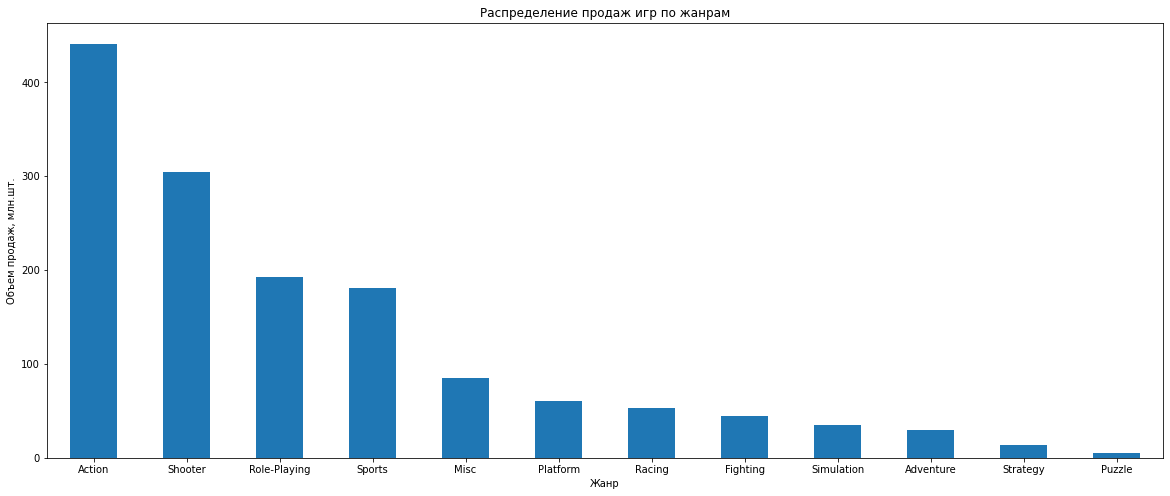

In [47]:
(actual_period.groupby('genre').agg({'total_sales':'sum'})
.sort_values(by='total_sales', ascending=False).plot(kind='bar', figsize=(20,8), rot=360))
plt.legend().remove()
plt.title('Распределение продаж игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Объем продаж, млн.шт.')
plt.show()

In [48]:
top_genres = actual_period.groupby('genre').agg({'name':'count', 'total_sales':'sum'})
                         
display(top_genres. sort_values(by='name', ascending=False))

,name,total_sales
genre,,
Action,1031,441.12
Role-Playing,370,192.80
Adventure,302,29.43
Sports,268,181.07
Shooter,235,304.73
Misc,192,85.04
Racing,115,53.50
Fighting,109,44.49
Platform,85,61.00


Посчитаем самые прибыльные жанры. 
Для этого объем продаж разделим на количество выпущенных игр: 

In [49]:
sales_per_title = (top_genres['total_sales']/top_genres['name']).sort_values(ascending=False)
display(sales_per_title)

genre
Shooter         1.296723
Platform        0.717647
Sports          0.675634
Role-Playing    0.521081
Racing          0.465217
Misc            0.442917
Simulation      0.439000
Action          0.427856
Fighting        0.408165
Strategy        0.187887
Puzzle          0.174643
Adventure       0.097450
dtype: float64

Видим, что самые прибыльный жанр не совпадает с тем, в котором больше всего продаж. Это может быть связано с тем, что игры производятся для разных платформ, на одной из которых игра может стать бестселлером, а на другой совсем плохо продаваться. 
Для прибыльности нужны жанры, которые приносит доход стабильно, не зависимо от платформы.
Дополнително проиллюстрировать ситуацию нам поможет "ящик с усами".

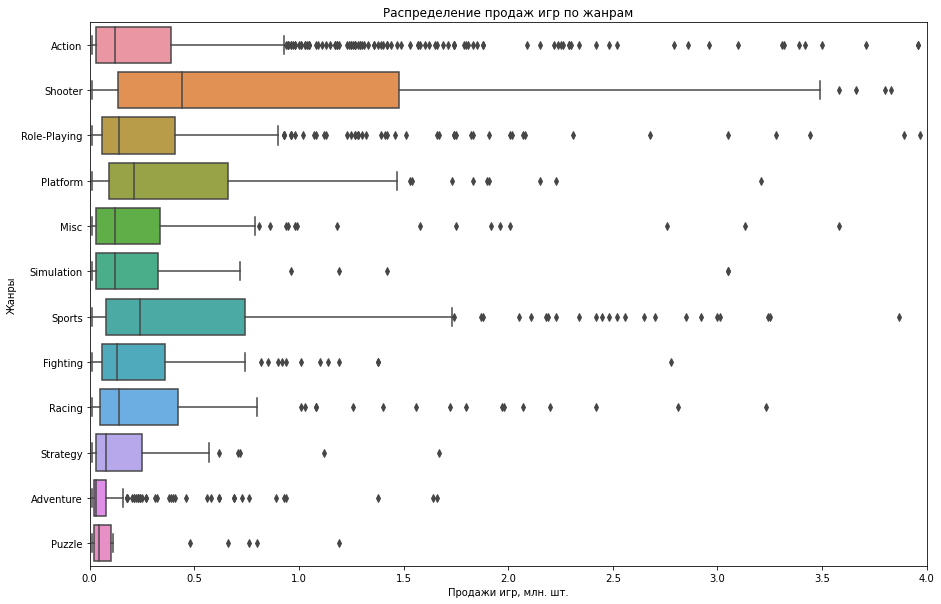

In [50]:
plt.figure(figsize=(15,10))

ax = sns.boxplot(y='genre', x='total_sales', data=actual_period)
ax.set_xlim(0, 4)
ax.set_title('Распределение продаж игр по жанрам')
ax.set_ylabel('Жанры')
ax.set_xlabel('Продажи игр, млн. шт.');

И в большем масштабе:

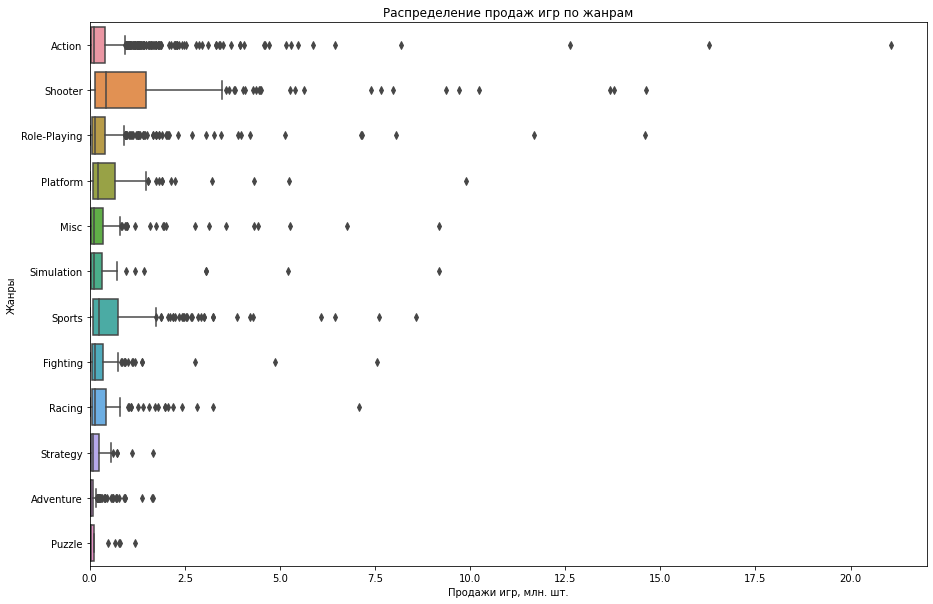

In [51]:
plt.figure(figsize=(15,10))

ax = sns.boxplot(y='genre', x='total_sales', data=actual_period)
ax.set_xlim(0, 22)
ax.set_title('Распределение продаж игр по жанрам')
ax.set_ylabel('Жанры')
ax.set_xlabel('Продажи игр, млн. шт.');

В Action очень много значений, которые выходят из "усов" и добавляют к объеу продаж, но это единичные игры. Медиана у Shooter значительно выше.

**Вывод**

Видно, что на каждую игру, выпущенную в жанре Shooter, в среднем приходится 1.297 млн. шт. продаж, на Platform - 0.718, на Sports - 0.676. Это самые прибыльные жанры за последние 5 лет.

Самые низкие продажи среди жанров Adventure - 0.097 млн шт. на одну игру, Strategy - 0.188, Puzzle - 0.175

Больше всего игр было произведено в жанре Action - 1031, сильно отстают и идут на втором месте игры в жанре Role-Playing - 370 игр.

Меньше всего игр было выпущено в жанре Puzzle - всего 28 за 5 лет.

Больше всего продаж было также в жанре Action - 441.12 млн.шт, на втором месте Shooter - 304.71, на третьем - Role-Playing - 192.80.

Меньше всего продаж в жанрах Puzzle - 4.89 млн.шт.

### Портрет пользователя каждого региона

Определим для каждого региона самые популярные платформы и жанры

#### Самые популярные платформы по регионам

In [52]:
region_sales = (actual_period.pivot_table(index='platform', 
                values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum')
                .sort_values('other_sales', ascending = False))

In [53]:
display(region_sales)

,eu_sales,jp_sales,na_sales,other_sales
platform,,,,
PS4,141.09,15.96,108.74,48.35
PS3,106.86,35.29,103.38,43.26
X360,74.52,1.57,140.05,20.40
XOne,51.59,0.34,93.12,14.27
3DS,42.64,87.79,55.31,8.87
WiiU,25.13,13.01,38.10,5.95
PSV,11.36,21.04,10.98,5.80
PC,37.76,0.00,19.12,5.77
Wii,11.92,3.39,17.45,2.61


In [54]:
region_sales.apply(lambda col: col / col.sum(),axis=0).style.format("{:.1%}")

,eu_sales,jp_sales,na_sales,other_sales
platform,,,,
PS4,27.8%,8.3%,18.4%,31.0%
PS3,21.1%,18.3%,17.5%,27.7%
X360,14.7%,0.8%,23.7%,13.1%
XOne,10.2%,0.2%,15.8%,9.1%
3DS,8.4%,45.6%,9.4%,5.7%
WiiU,5.0%,6.8%,6.4%,3.8%
PSV,2.2%,10.9%,1.9%,3.7%
PC,7.5%,0.0%,3.2%,3.7%
Wii,2.4%,1.8%,3.0%,1.7%


Создадим отдельные переменные для Северной Америки, Европы и Японии, выделим топ-5 для каждого региона, добавим категорияю "other", в которую будут входить продажы игр на платформах не из топ-5.

In [55]:
na_games = (
    actual_period.pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False).reset_index()
)
 
top_platform_na = na_games['platform'][:5].tolist()
print('Топ-5 для NA:', top_platform_na)

def platform(i):
    if 'X360' in i:
        return 'X360'
    elif 'PS4' in i:
        return 'PS4'
    elif 'PS3' in i:
        return 'PS3'
    elif 'XOne' in i:
        return 'XOne'
    elif '3DS' in i:
        return '3DS'
    else:
        return 'other'

na_games['category'] = na_games['platform'].apply (platform)
display(na_games)

Топ-5 для NA: ['X360', 'PS4', 'PS3', 'XOne', '3DS']


,platform,na_sales,category
0,X360,140.05,X360
1,PS4,108.74,PS4
2,PS3,103.38,PS3
3,XOne,93.12,XOne
4,3DS,55.31,3DS
5,WiiU,38.10,other
6,PC,19.12,other
7,Wii,17.45,other
8,PSV,10.98,other
9,DS,4.59,other


In [56]:
jp_games = (
    actual_period.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False).reset_index()
)
 
top_platform_jp = jp_games['platform'][:5].tolist()
print('Топ-5 для JP:', top_platform_jp)

Топ-5 для JP: ['3DS', 'PS3', 'PSV', 'PS4', 'WiiU']


In [57]:
def platform(i):
    if '3DS' in i:
        return '3DS'
    elif 'PS4' in i:
        return 'PS4'
    elif 'PS3' in i:
        return 'PS3'
    elif 'PSV' in i:
        return 'PSV'
    elif 'WiiU' in i:
        return 'WiiU'
    else:
        return 'other'

jp_games['category'] = jp_games['platform'].apply (platform)
display(jp_games)

,platform,jp_sales,category
0,3DS,87.79,3DS
1,PS3,35.29,PS3
2,PSV,21.04,PSV
3,PS4,15.96,PS4
4,WiiU,13.01,WiiU
5,PSP,10.47,other
6,DS,3.72,other
7,Wii,3.39,other
8,X360,1.57,other
9,XOne,0.34,other


In [58]:
eu_games = (
    actual_period.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False).reset_index()
)
 
top_platform_eu = eu_games['platform'][:5].tolist()
print('Топ-5 для EU:', top_platform_eu)

Топ-5 для EU: ['PS4', 'PS3', 'X360', 'XOne', '3DS']


In [59]:
def platform(i):
    if '3DS' in i:
        return '3DS'
    elif 'PS4' in i:
        return 'PS4'
    elif 'PS3' in i:
        return 'PS3'
    elif 'X360' in i:
        return 'X360'
    elif 'XOne' in i:
        return 'XOne'
    else:
        return 'other'

eu_games['category'] = eu_games['platform'].apply (platform)
eu_games

,platform,eu_sales,category
0,PS4,141.09,PS4
1,PS3,106.86,PS3
2,X360,74.52,X360
3,XOne,51.59,XOne
4,3DS,42.64,3DS
5,PC,37.76,other
6,WiiU,25.13,other
7,Wii,11.92,other
8,PSV,11.36,other
9,DS,3.53,other


Построим круговые диаграммы для каждого региона:

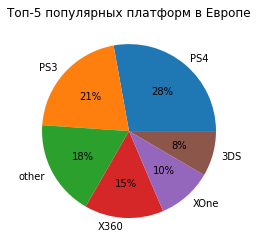

In [60]:
(eu_games.groupby('category')['eu_sales'].agg('sum').sort_values(ascending=False)
.plot(kind='pie', legend=False, title='Топ-5 популярных платформ в Европе', autopct='%1.0f%%', ylabel=''));

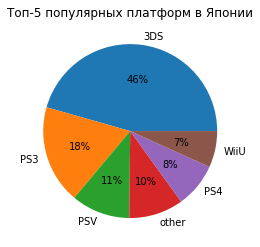

In [61]:
(jp_games.groupby('category')['jp_sales'].agg('sum').sort_values(ascending=False)
.plot(kind='pie', legend=False, title='Топ-5 популярных платформ в Японии', autopct='%1.0f%%', ylabel=''));

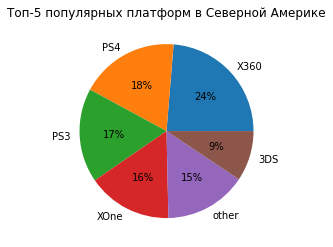

In [62]:
(na_games.groupby('category')['na_sales'].agg('sum').sort_values(ascending=False)
.plot(kind='pie', legend=False, title='Топ-5 популярных платформ в Северной Америке', 
autopct='%1.0f%%', ylabel=''));

**Вывод**

Видно, что европейцы отдают предпочтение PS4 и PS3 - платформам от Sony, американцы используют как платформы от Microsoft (X360), так и от Sony (PS4) почти в равной степени, а японцы предпочитают 3DS от Nintendo.

Топ 5 для NA:

1) X360 - 23.7%, 
2) PS4 - 18.4%, 
3) PS3 - 17.5%, 
4) XOne - 15.8%, 
5) 3DS - 9.4%.

Топ 5 для EU:

1) PS4 - 27.8%, 
2) PS3 - 21.1%, 
3) X360 - 14.7%, 
4) XOne - 10.2%,
5) 3DS - 8.4%.

Топ 5 для JP:

1) 3DS - 45.6%,
2) PS3 - 18.3%,
3) PSV - 10.9%,
4) PS4 - 8.3%,
5) WiiU - 6.8%.


#### Самые популярные жанры по регионам

In [63]:
region_genres = (actual_period.pivot_table(index='genre', 
                values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum')
                .sort_values('other_sales', ascending = False))


In [64]:
display(region_genres)

,eu_sales,jp_sales,na_sales,other_sales
genre,,,,
Action,159.34,52.80,177.84,51.14
Shooter,113.47,9.23,144.77,37.26
Sports,69.09,8.01,81.53,22.44
Role-Playing,48.53,65.44,64.00,14.83
Misc,26.32,12.86,38.19,7.67
Racing,27.29,2.50,17.22,6.49
Platform,21.41,8.63,25.38,5.58
Fighting,10.79,9.44,19.79,4.47
Adventure,9.46,8.24,8.92,2.81


In [65]:
region_genres.apply(lambda col: col / col.sum(),axis=0).style.format("{:.1%}")

,eu_sales,jp_sales,na_sales,other_sales
genre,,,,
Action,31.4%,27.4%,30.1%,32.7%
Shooter,22.4%,4.8%,24.5%,23.9%
Sports,13.6%,4.2%,13.8%,14.4%
Role-Playing,9.6%,34.0%,10.8%,9.5%
Misc,5.2%,6.7%,6.5%,4.9%
Racing,5.4%,1.3%,2.9%,4.2%
Platform,4.2%,4.5%,4.3%,3.6%
Fighting,2.1%,4.9%,3.3%,2.9%
Adventure,1.9%,4.3%,1.5%,1.8%


По аналогии с платформами, создадим отдельные переменные для Северной Америки, Европы и Японии, выделим топ-5 для каждого региона, добавим категорияю "other", в которую будут входить продажы игр в жанрах не из топ-5.

In [66]:
eu_genres = (
    actual_period.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False).reset_index()
)
 
top_genres_eu = eu_genres['genre'][:5].tolist()
print('Топ-5 для EU:', top_genres_eu)

Топ-5 для EU: ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Racing']


In [67]:
def genres(i):
    if 'Action' in i:
        return 'Action'
    elif 'Shooter' in i:
        return 'Shooter'
    elif 'Sports' in i:
        return 'Sports'
    elif 'Role-Playing' in i:
        return 'Role-Playing'
    elif 'Racing' in i:
        return 'Racing'
    else:
        return 'other'

eu_genres['category'] = eu_genres['genre'].apply (genres)
eu_genres

,genre,eu_sales,category
0,Action,159.34,Action
1,Shooter,113.47,Shooter
2,Sports,69.09,Sports
3,Role-Playing,48.53,Role-Playing
4,Racing,27.29,Racing
5,Misc,26.32,other
6,Platform,21.41,other
7,Simulation,14.55,other
8,Fighting,10.79,other
9,Adventure,9.46,other


In [68]:
jp_genres = (
    actual_period.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False).reset_index()
)
 
top_genres_jp = jp_genres['genre'][:5].tolist()
print('Топ-5 для JP:', top_genres_jp)

Топ-5 для JP: ['Role-Playing', 'Action', 'Misc', 'Simulation', 'Fighting']


In [69]:
def genres(i):
    if 'Action' in i:
        return 'Action'
    elif 'Misc' in i:
        return 'Misc'
    elif 'Simulation' in i:
        return 'Simulation'
    elif 'Role-Playing' in i:
        return 'Role-Playing'
    elif 'Fighting' in i:
        return 'Fighting'
    else:
        return 'other'

jp_genres['category'] = jp_genres['genre'].apply (genres)
jp_genres

,genre,jp_sales,category
0,Role-Playing,65.44,Role-Playing
1,Action,52.80,Action
2,Misc,12.86,Misc
3,Simulation,10.41,Simulation
4,Fighting,9.44,Fighting
5,Shooter,9.23,other
6,Platform,8.63,other
7,Adventure,8.24,other
8,Sports,8.01,other
9,Strategy,2.88,other


In [70]:
na_genres = (
    actual_period.pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False).reset_index()
)
 
top_genres_na = na_genres['genre'][:5].tolist()
print('Топ-5 для NA:', top_genres_na)

Топ-5 для NA: ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc']


In [71]:
def genres(i):
    if 'Action' in i:
        return 'Action'
    elif 'Shooter' in i:
        return 'Shooter'
    elif 'Sports' in i:
        return 'Sports'
    elif 'Role-Playing' in i:
        return 'Role-Playing'
    elif 'Misc' in i:
        return 'Misc'
    else:
        return 'other'

na_genres['category'] = na_genres['genre'].apply (genres)
na_genres

,genre,na_sales,category
0,Action,177.84,Action
1,Shooter,144.77,Shooter
2,Sports,81.53,Sports
3,Role-Playing,64.00,Role-Playing
4,Misc,38.19,Misc
5,Platform,25.38,other
6,Fighting,19.79,other
7,Racing,17.22,other
8,Adventure,8.92,other
9,Simulation,7.97,other


Построим круговые диаграммы для каждого региона:

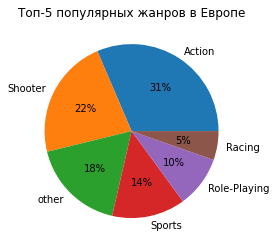

In [72]:
(eu_genres.groupby('category')['eu_sales'].agg('sum').sort_values(ascending=False)
.plot(kind='pie', legend=False, title='Топ-5 популярных жанров в Европе', autopct='%1.0f%%', ylabel=''));

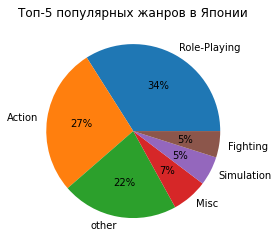

In [73]:
(jp_genres.groupby('category')['jp_sales'].agg('sum').sort_values(ascending=False)
.plot(kind='pie', legend=False, title='Топ-5 популярных жанров в Японии', autopct='%1.0f%%', ylabel=''));

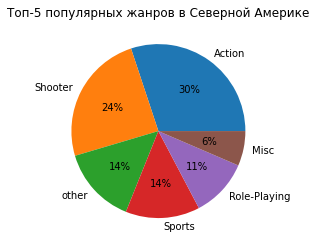

In [74]:
(na_genres.groupby('category')['na_sales'].agg('sum').sort_values(ascending=False)
.plot(kind='pie', legend=False, title='Топ-5 популярных жанров в Северной Америке', autopct='%1.0f%%', ylabel=''));

**Вывод**

Европейский и американский рынок похожи. Топ 5 жанров: Action, Shooter, Sports, Role-Playing, Racing (у европейцев) и Misc-другое (у амерканцев).

А вот рынок японский соврешенно особенный, там лидер - Role-Playing, далее идут Action и со значительным отрывом отстают все остальные - Simulation, Fighting и  другое(Misc).

#### Влияние рейтинга ESRB

In [75]:
region_esrb = (actual_period
.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],aggfunc='sum')
.sort_values('other_sales', ascending = False))

In [76]:
display(region_esrb)

,eu_sales,jp_sales,na_sales,other_sales
rating,,,,
M,193.96,21.20,231.57,63.38
E,113.03,28.33,114.37,31.44
no_rating,91.50,108.84,103.31,27.17
T,52.96,26.02,66.02,17.94
E10+,55.37,8.19,75.70,16.23


In [77]:
region_esrb.apply(lambda col: col / col.sum(),axis=0).style.format("{:.1%}")

,eu_sales,jp_sales,na_sales,other_sales
rating,,,,
M,38.3%,11.0%,39.2%,40.6%
E,22.3%,14.7%,19.4%,20.1%
no_rating,18.1%,56.5%,17.5%,17.4%
T,10.4%,13.5%,11.2%,11.5%
E10+,10.9%,4.3%,12.8%,10.4%


**Вывод**

В Японии больше половина игр из нашей выборки не имеет рейтинга. Возможно, это связано с государственной политикой в области игр, либо японцы играют в игры без ограничений и рейтинг в датафрейме не указан по этой причине.
Самые продаваемые игры в Европе и Америке с ретингом М (от 17 лет), далее идут E (для всех) и E10+ (от 10 лет).
В Японии из тех, что имеют рейтинг, самые продаваемые с рейтингами Е и T.

### Проверка гипотез

**Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

Нулевая гипотеза - это та, что проверяется на выбороке, поэтому

Н_0: средний пользовательский рейтинг платформы Xbox One = среднему пользовательскому рейтингу платформы PC

Альтенативная гипотеза противоположна по смыслу нулевой:

Н_a: средний пользовательский рейтинг платформы Xbox One ≠ среднему пользовательскому рейтингу платформы PC.


У нас проверка гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

Значения берем из выборки за актуальные годы - actual_period.

In [78]:
xone = actual_period[(actual_period['platform'] == 'XOne')].user_score.dropna().reset_index(drop=True)

pc = actual_period[(actual_period['platform'] == 'PC')].user_score.dropna().reset_index(drop=True)

alpha = .05 

results = st.ttest_ind(xone, pc) 

print('p-значение: ', results.pvalue)
if (results.pvalue  < alpha):
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение:  0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Мы не можем сказать, что пользовательские рейтинги платформы Xbox One не равны пользовательским рейтингам платформы PC.

**Проверка гиптезы: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

H_0: cредний пользовательский рейтинг жанра Action = cредний пользовательский рейтинг жанра Sports

H_a: cредний пользовательский рейтинг жанра Action ≠ cредний пользовательский рейтинг жанра Sports

In [79]:
action = actual_period[(actual_period['genre']=='Action')].user_score.dropna().reset_index(drop=True)

sports = actual_period[(actual_period['genre'] == 'Sports')].user_score.dropna().reset_index(drop=True)

alpha = .05 

results = st.ttest_ind(action, sports)

print('p-значение: ', results.pvalue)
if (results.pvalue  < alpha):
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  3.7163089460934874e-26
Отвергаем нулевую гипотезу


Мы не можем сказать, что средние пользовательские рейтинги жанров Action и Sports равны.

Покажем дополнительно средние пользовательские оценки игр на платформах 'XOne' и 'PC':

In [80]:
(
display(actual_period.query('platform in ["XOne", "PC"]')
.pivot_table(index='platform', values='user_score', aggfunc='mean'))
)

,user_score
platform,
PC,6.428641
XOne,6.521429


Средние оценки лежат очень близко, и выше мы доказали статистически, что можем считать их равными.

А теперь посмотрим на данные по второй гипотезе. Выведем средние пользовательские оценки игр в жанрах Action и Sports: 

In [81]:
(
display(actual_period.query('genre in ["Action", "Sports"]')
.pivot_table(index='genre', values='user_score', aggfunc='mean'))
)

,user_score
genre,
Action,6.825048
Sports,5.455897


Оценки различаются на 1.3 балла и статистически мы показали выше, что не можем считать их равными.

**Вывод**

Как сформулировали нулевые и альтернативные гипотезы.

Для первой гипотезы:"Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".

Нулевую гипотезу сформулировали как "средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC", альтернативной гипотезой в данном случае будет противоположное утверждение: "средний пользовательский рейтинг платформы Xbox One не равен среднему пользовательскому рейтингу платформы PC".

Для второй гипотезы: "Средние пользовательские рейтинги жанров Action и Sports разные".

В данном случае нулевую гипотезу сформулировали как "средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports", поскольку нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства.
Соответственно, альтернативная гипотеза о том, что средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports. 

В нашем случае мы проверяем гипотезу о равенстве среднийх двух генеральных совокупностей, поэтому использвоали метод scipy.stats.ttest_ind(). Параметр equal_var не указывали, поскольку по умолчани он сам принимает значение True, а оно нам подходит и мы считаем, что дисперсии генеральных совокупностей примерно равны в обоих случаях. 
Уровень значимости выбрали ранвым 0.05 в обоих случах. 
Решение о принятии или отвержении нулевой гипотезы принималось по p-value. 

В итоге, первую гипотезу мы опровергнуть не смогли и приняли, что средние оценки пользователей на платформах XBox One и PC равны. 
При проверке второй гипотезы нулевую гипотезу отвергли, то есть средние пользовательские оценки жанров Action и Sports не равны. 

### Общий вывод

Мы проанализировали исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах. 

Всего в данных было 16714 строк и 11 столбцов.
Данные не были иедальными, поэтому мы осуществили предобработку.

**Выводы по итогам предобработки данных:**

- удалили пропуски там, где это было возможно (значения без года выпуска и названия игры);
- определили возможные оценки от ESRB, привели их к современному виду, пропуски в столбце заполнили значением "no_rating";
- выяснили, что tbd ставят в случаях, когда у игры менее 4 оценок и поэтому заменили эти значения на nan;
- определили, что до 1996 года игры практически не оценивались, однако лишь небольшая часть пропусков в рейтингах связана с этим (около 8%);
- изменили тип данных в столбцах year_of_release и user_score на int64 и float64 соответственно;
- посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.

**Выводы по исследовательскому анализу данных:**
- Пик выпуска игр пришелся с 2002 по 2011 годы, с 2012 наблюдается снижение, до 1994 выпускалось мало игр. Вилимо, это связано с развитием компьютерной техники и компьютеризации общества, максимальные значения видим в 2008-2009 годах, последующий спад, скорее всего, связан с развитием смартфонов и переходом игр в другой формат.  
- Жизненный цикл платформы - 10-12 лет. Пик приходится на 3-5 годы. Соответственно для прогноза на 2017 год актуальной является информация за последние 5 лет. 
- При анализе продаж в 2012-2016 гг. не видно ни одной платформы, по которой наблюдался бы рост в последние 2-3 года. Все они идут на спад или уже мертвы.
- Лидируют по продажам на 2016 год PS4 - 69.25 млн.копий, XOne - 26.15 и 3DS - 15.14
- Медианные значения продаж на всех платформах сдвинуты влево, это говорит о том, что на всех этих платформах выходит достаточно много игр с небольшими продажами. 
- Наибольший разброс значений у X360 и PS4.
- У каждой платформы есть одна игра, которая находится далеко за пределеами "усов" - это самые популярные игры (например, "Grand Theft Auto V" на PS3 и  X360, "Call of Duty: Black Ops 3" на PS4 и Pokemon X/Pokemon Y на 3DS с продажам 21.05 и 16.27, 14.63 и 14.60 млн. копий соответственно).
- Выбросов у WiiU и DS меньше, чем у остальных платформ, то есть на них меньше популярных игр, и больше игр, объем продаж которых лежит рядом с медианным значением. 
- Коэффициенты корреляции показывают, что взаимосвзяь между оценками и объемом продаж слабая. Оценки критиков влияют на продажу чуть больше, чем оценки пользователей. Возможно популярность той или иной игры связана больше с рекламой и пиаром, а не оценками. В этой связи люди стараются купить игру как можно быстрее, сразу после выхода, а затем уже оценивают ее.
- Рассмотрели коэффцииент коререляции на PS4. Он составил 0.41 с оценками критиков и -0.03 с оценками пользователей. 
- Сравнили эти показатели с 6 другими платформами и нашли некоторые интересные особенности: на платформе PSV корреляция с оценками критиков всего 0.09, что значиельно ниже показателей остальных платформ, корреляция с оценками пользователей вообще 0. То есть можно сделать вывод, что на объем продаж игр на платформе оценки пользвателй и критиков никак не влияют. А на платформе WiiU корреляция оценок пользователй и оценок критиков с обемом продаж примерно одинакова.
- Самые прибыльные жанры за последние 5 лет по нашим топ-6 перспективных платформ:Shooter, Platform и Sports (на одну выпущенную игру в жанре приходится 1.297 млн. шт. продаж, 0.718 и 0.676 соответственно. Наименее прибыльне жанры: Adventure, Strategy, Puzzle.
- Больше всего игр было произведено в жанре Action - 1031, сильно отстают и идут на втром месте игры в жанре Role-Playing	- 370 игр. Меньше всего игр было выпущено в жанре Puzzle - всего 28 за 5 лет.
- Больше всего продаж было также в жанре Action - 441.12 млн.шт, на втором месте Shooter - 304.71, на третьем - Role-Playing - 192.80. Меньше всего продаж в жанре Puzzle - 4.89 млн.шт.

**Выводы по портрету пользователя**
- из игровых платформ европейцы отдают предпочтение PS4, американцы PS4 и XOne почти в равной степени, а японцы предпочитают 3DS;
- из жанров европейцы и американцы предпочитают Action и Shooter, японцы - Role-Playing и отстает от него Action;
- в Японии больше половина игр из нашей выборки не имеет рейтинга, Возможно, это связано с государственной политикой в области игр, либо японцы играют в игры без ограничений и рейтинг в датафрейме не указан по этой причине;
- cамые продаваемые игры в Европе и Америке с рейтингом М (от 17 лет), далее идут E (для всех) и E10+ (от 10 лет); в Японии из тех, что имеют рейтинг, самые продаваемые с рейтингами Е и T.


**Выводы по гипотезам**

Первую гипотезу мы опровергнуть не смогли и приняли, что средние оценки пользователей на платформах XBox One и PC равны. 
При проверке второй гипотезы нулевую гипотезу отвергли, то есть средние пользовательские оценки жанров Action и Sports не равны. 


**В итоге,** можно дать рекомендацию тратить рекламный бюджет на игры на платформе PS4 или XOne, в жанре Shooter и лучше рекламировать такую игру на Европу или Северную Америку (в первом случае лучше выбрать PS4, во втором XOne), оптимальный рейтинг для игры по  ESRB - M (от 17 лет).